In [1]:
library("data.table")
library("qtl")

In [2]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./new_subsets",
                    genfile="20190827_rqtl_f3_geno.csv",
                    phefile = "20190827_rqtl_f3_pheno.csv" )

 --Read the following data:
	 429  individuals
	 1013  markers
	 7  phenotypes
 --Cross type: f2 


In [3]:
summary(datf2)

    F2 intercross

    No. individuals:    429 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 100 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  92.9 
    Genotypes (%):      AA:26.0  AB:47.3  BB:26.7  not BB:0.0  not AA:0.0 

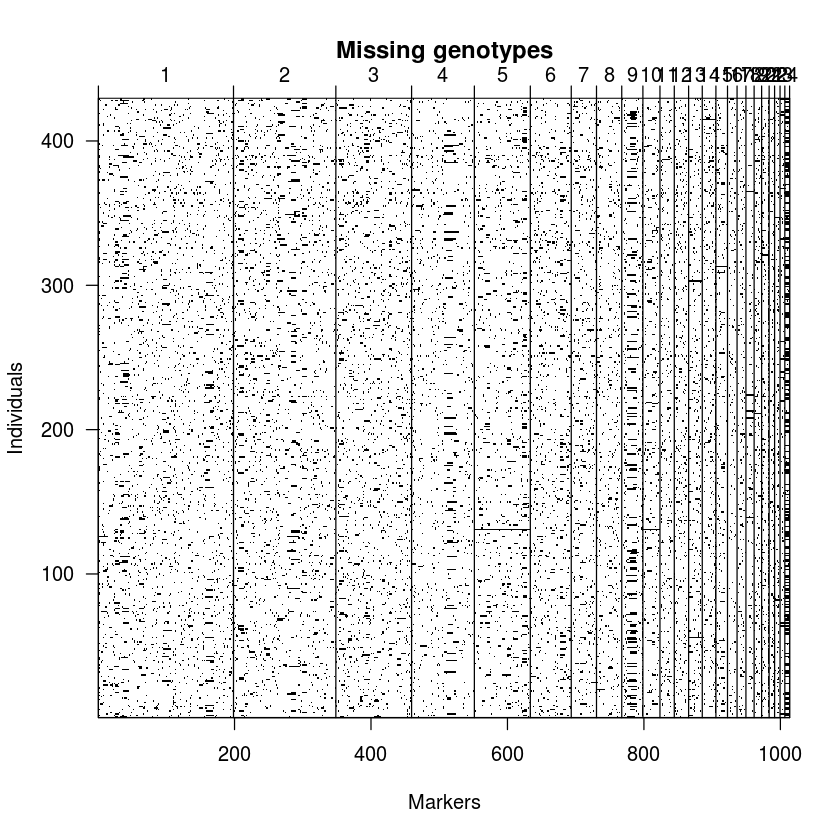

In [4]:
plotMissing(datf2)

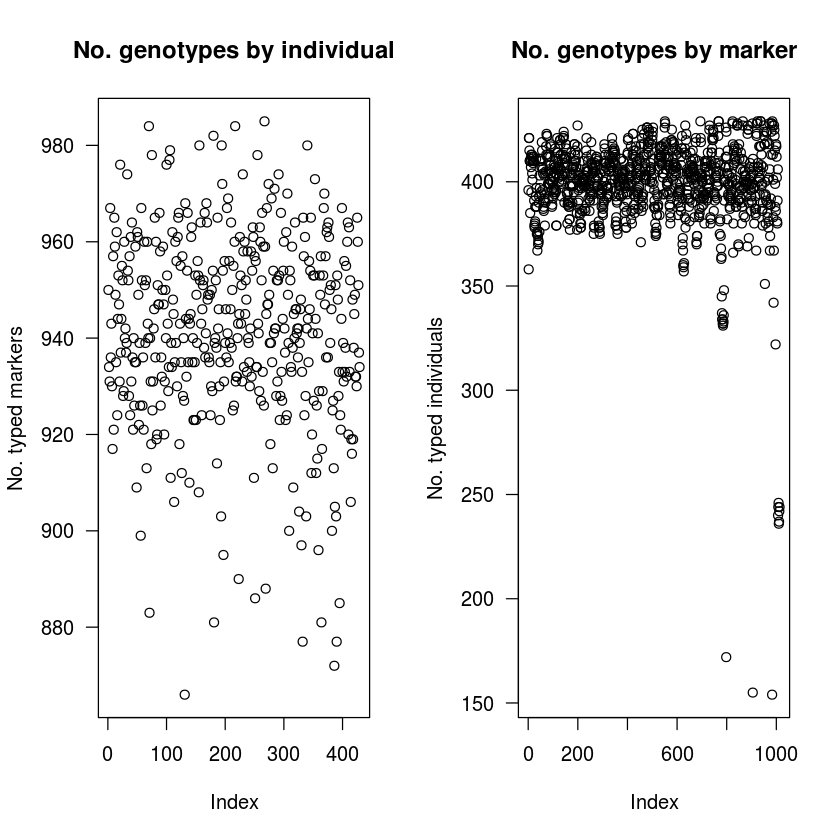

In [5]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [9]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 42]) # less than 10% of all markers


In [10]:
length(todrop)

[1] 0

In [11]:
datf2.1 <- drop.markers(datf2, todrop)

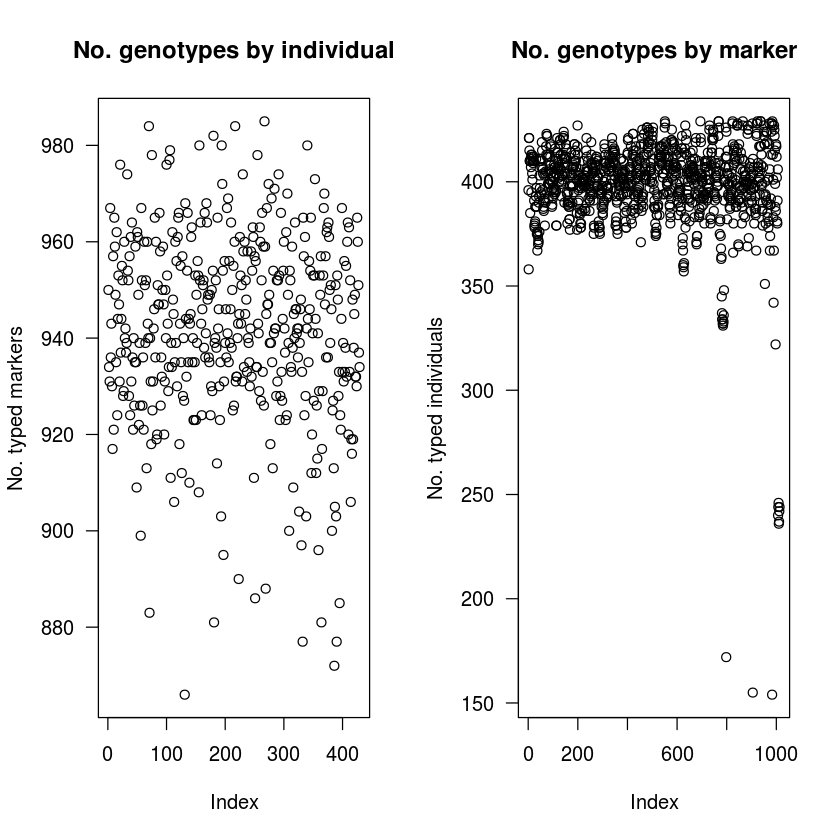

In [12]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [13]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>100)) # removing all individuals that have less than 10% of all markers


In [14]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 429

[1] 429

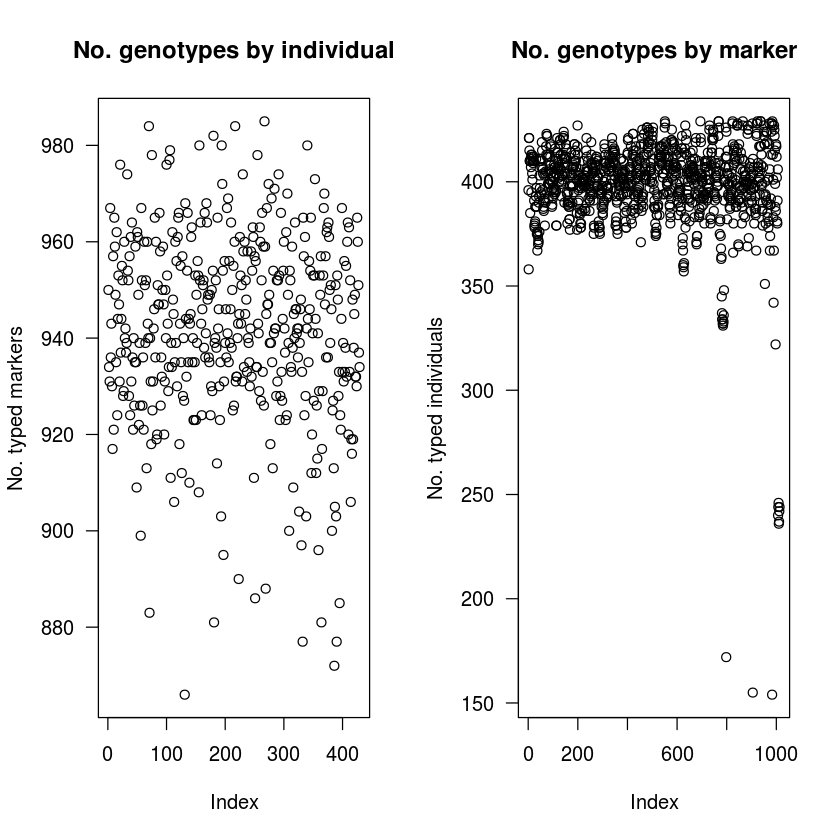

In [15]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [16]:
summary(datf2.2)

    F2 intercross

    No. individuals:    429 

    No. phenotypes:     7 
    Percent phenotyped: 100 100 100 100 100 100 100 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  92.9 
    Genotypes (%):      AA:26.0  AB:47.3  BB:26.7  not BB:0.0  not AA:0.0 

In [17]:
cg <- comparegeno(datf2.2)

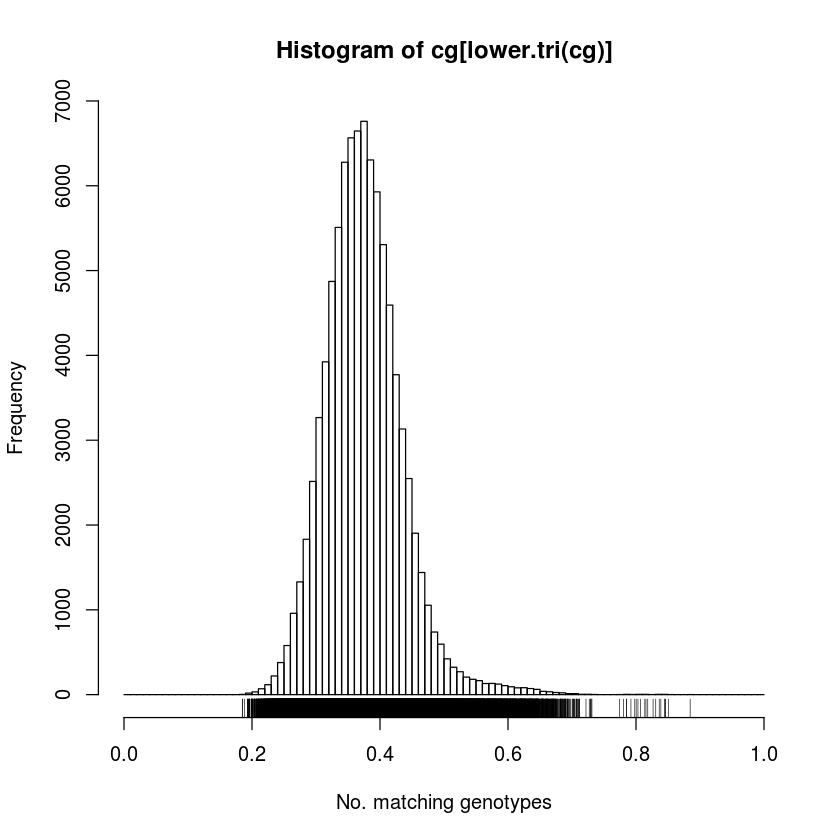

In [18]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [19]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [20]:
wh

row,col


In [21]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`1-20`
[1] "1-19"

$`1-28`
[1] "1-26" "1-27"

$`1-41`
[1] "1-42"

$`1-160`
[1] "1-161"

$`2-12`
[1] "2-13"

$`2-52`
[1] "2-51"

$`2-54`
[1] "2-53"

$`2-86`
[1] "2-87"

$`2-90`
[1] "2-91"

$`2-97`
[1] "2-98"

$`2-107`
[1] "2-106"

$`3-71`
[1] "3-70"

$`3-79`
[1] "3-80"

$`4-19`
[1] "4-20" "4-21"

$`4-34`
[1] "4-35"

$`4-42`
[1] "4-41"

$`4-49`
[1] "4-50"

$`4-53`
[1] "4-54" "4-55"

$`4-58`
[1] "4-56" "4-57"

$`4-65`
[1] "4-64"

$`4-71`
[1] "4-72"

$`5-12`
[1] "5-11"

$`5-22`
[1] "5-23"

$`5-43`
[1] "5-44"

$`5-64`
[1] "5-65"

$`5-78`
[1] "5-77"

$`6-26`
[1] "6-27"

$`6-35`
[1] "6-36"

$`6-45`
[1] "6-46"

$`7-8`
[1] "7-9"

$`7-21`
[1] "7-22"

$`8-15`
[1] "8-16"

$`9-10`
[1] "9-11"

$`9-16`
[1] "9-17" "9-18"

$`9-30`
[1] "9-31"

$`12-8`
[1] "12-9"

$`13-4`
[1] "13-3"

$`14-19`
[1] "14-20"

$`18-1`
[1] "18-2"

$`21-1`
[1] "20-11"



In [22]:
gt <- geno.table(datf2.2)

Warning message in getsex(cross):
"Sex column should be coded as 0=female 1=male; sex ignored."

In [23]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-114,1,50,92,156,131,0,0,4.843169e-05
1-115,1,23,89,168,149,0,0,3.375751e-07
1-116,1,15,89,177,148,0,0,2.884847e-06
1-117,1,8,94,180,147,0,0,1.524210e-05
1-118,1,18,98,165,148,0,0,7.796062e-07
1-119,1,23,102,155,149,0,0,5.104081e-08
1-120,1,15,104,159,151,0,0,7.060368e-08
1-121,1,20,102,161,146,0,0,8.427862e-07
1-122,1,22,110,151,146,0,0,5.431305e-08
1-123,1,27,107,146,149,0,0,3.616313e-09


In [24]:
length(todrop)

[1] 213

In [25]:
datf2.3 <- datf2.2

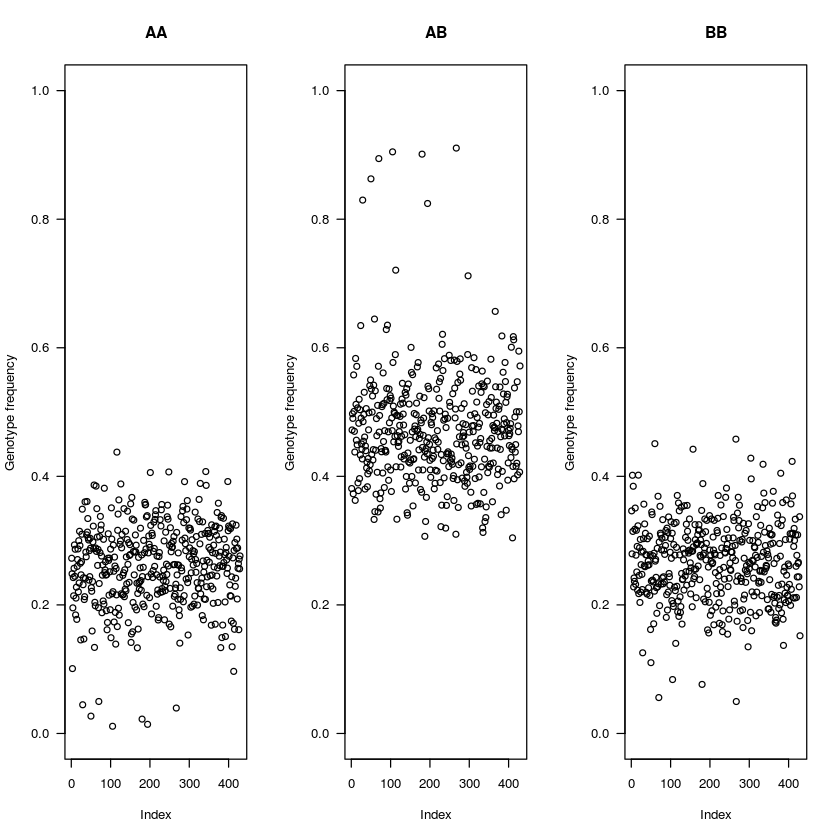

In [26]:
g <- pull.geno(datf2.2)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

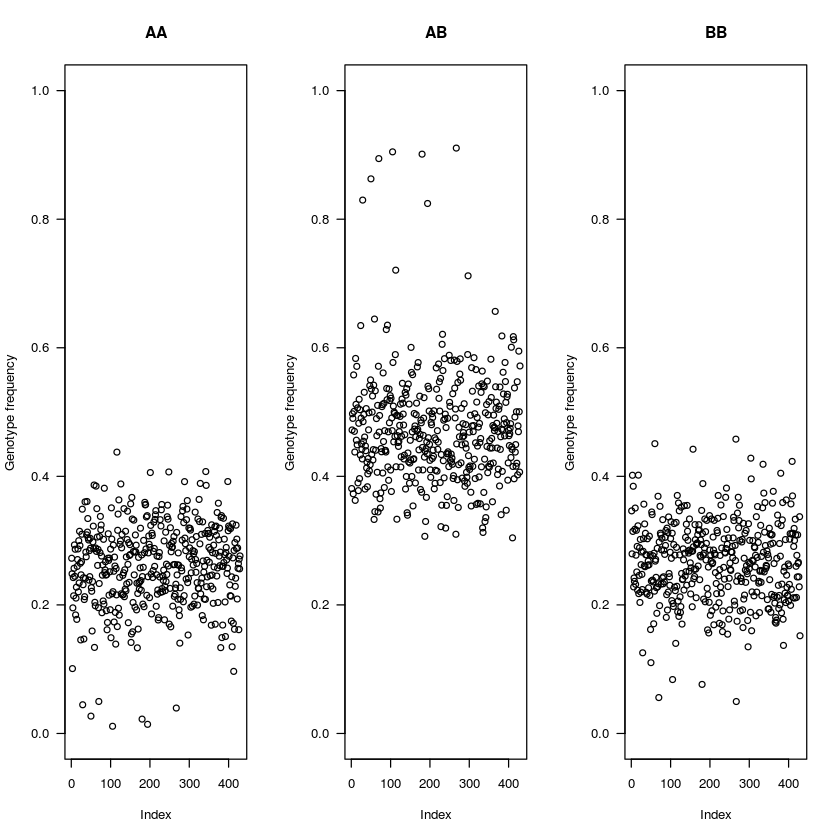

In [27]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [28]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [29]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [30]:
datf2.4 <- datf2.3

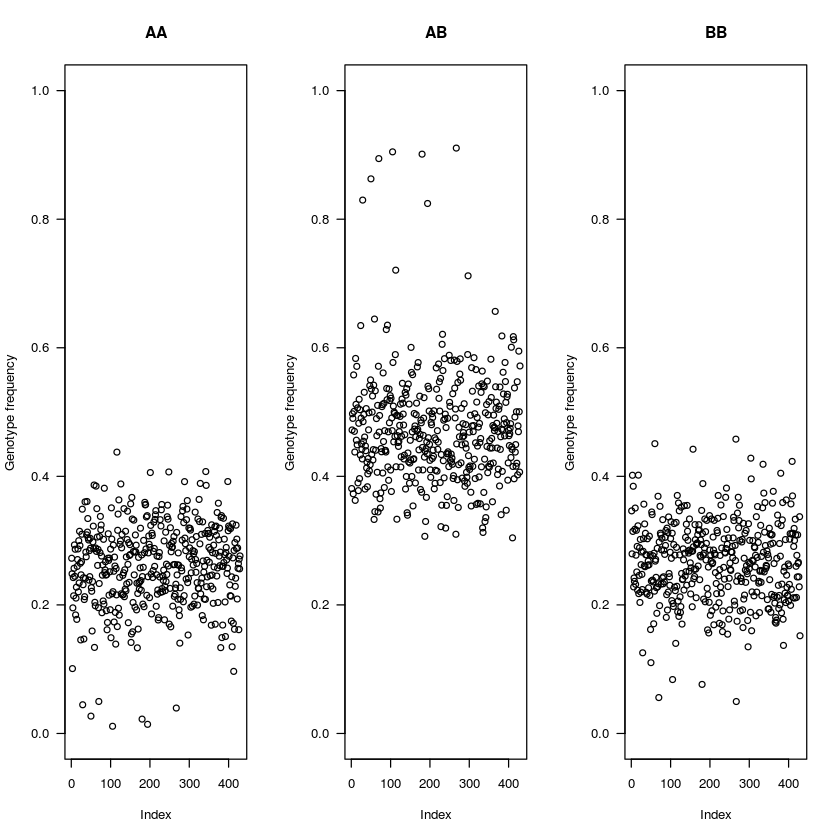

In [31]:
g <- pull.geno(datf2.4)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [32]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

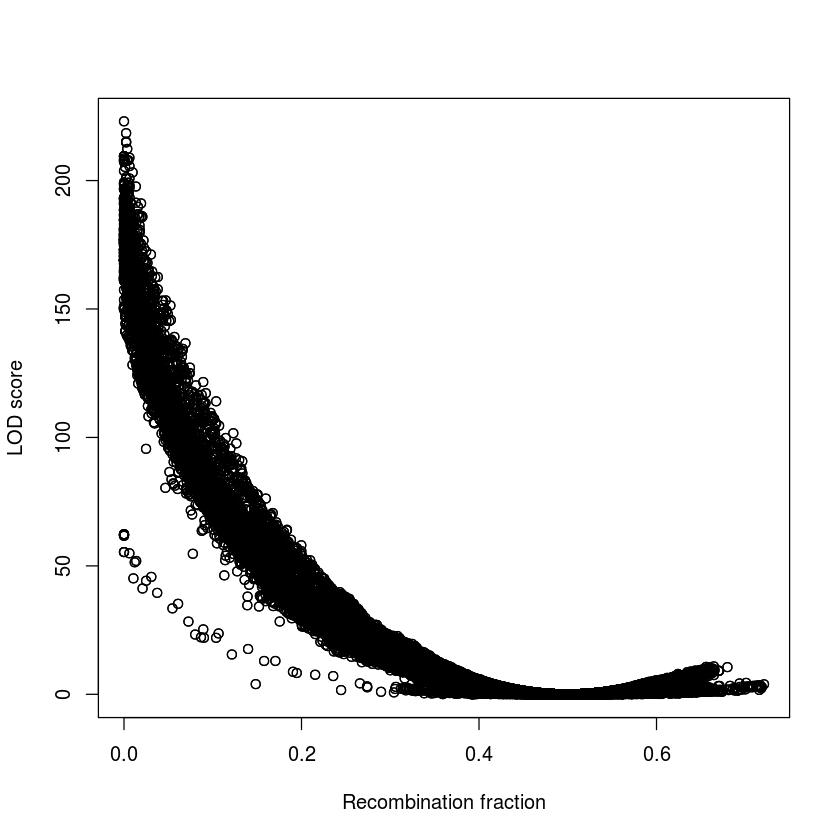

In [33]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

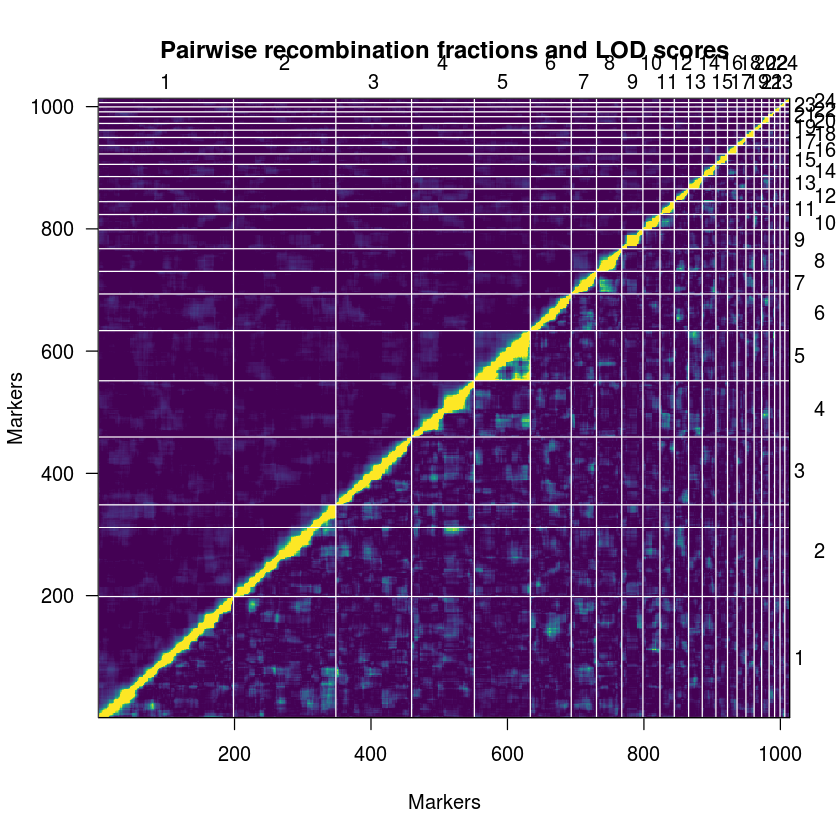

In [34]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [ ]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [ ]:
summaryMap(genmap)

In [ ]:
plotMap(genmap)

In [ ]:
datf2.4 <- replace.map(datf2.4, genmap)

In [ ]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [35]:
datf2.5 <- datf2.4

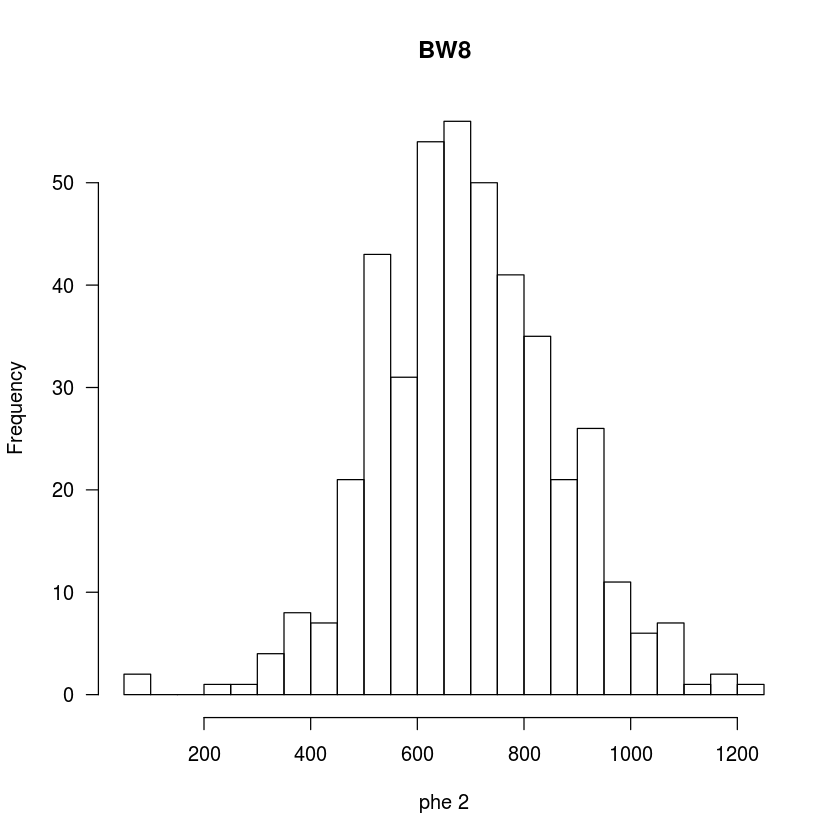

In [36]:
plotPheno(datf2.5, pheno.col =2 )

In [ ]:
#plotMissing(datf2.5, reorder=TRUE)

In [37]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [38]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [39]:
out.em <- scanone(datf2.5, pheno.col = 2)

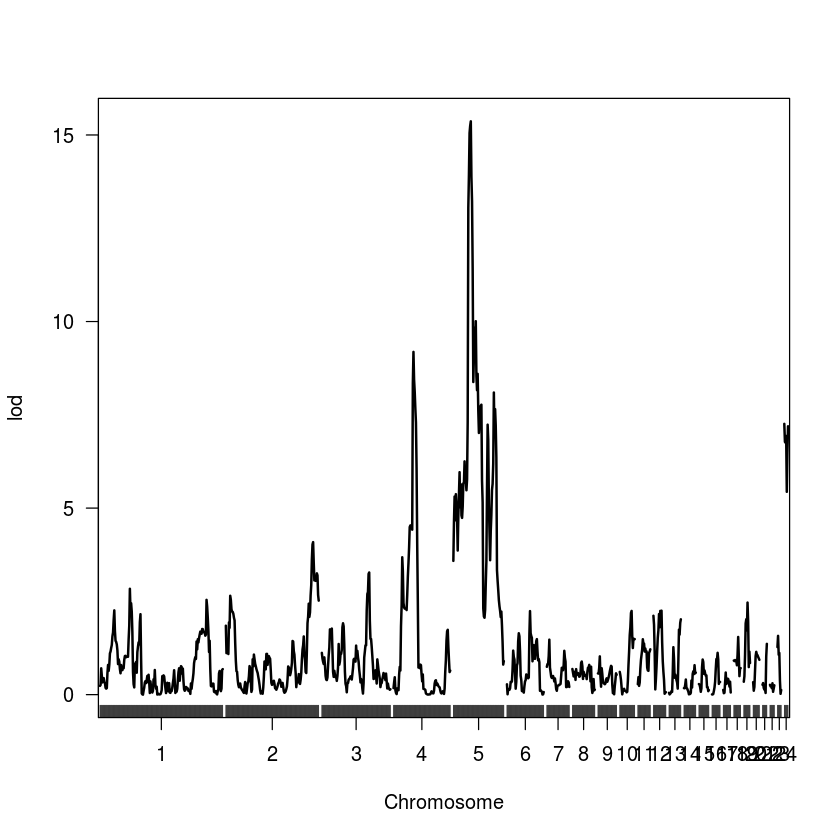

In [40]:
plot(out.em)

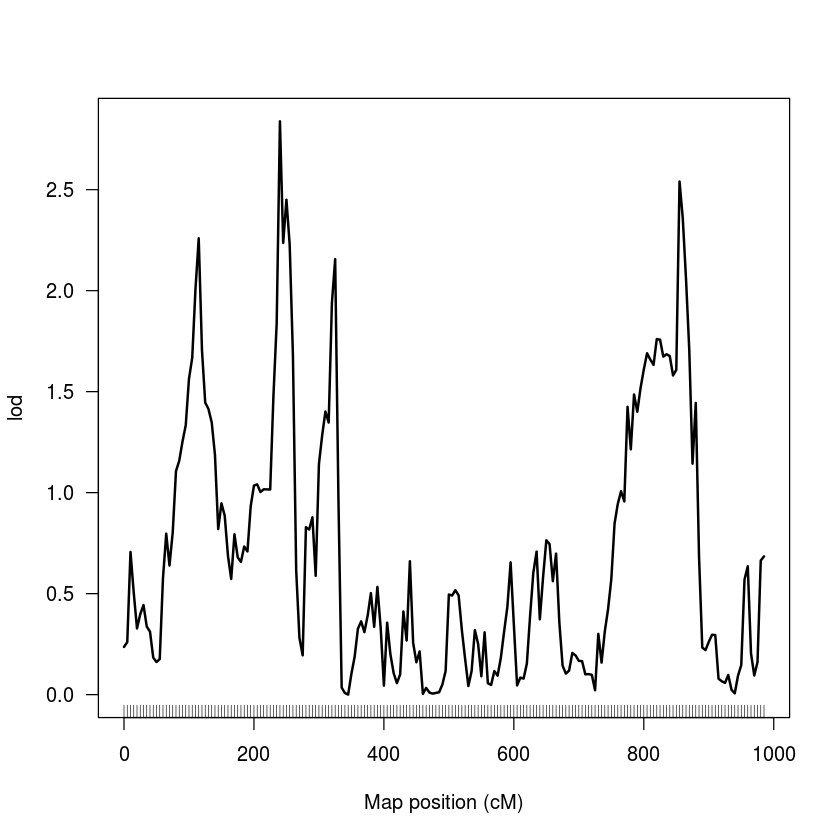

In [41]:
plot(out.em,chr=1)

In [42]:
ac <- pull.pheno(datf2.5, c("SEX"))

In [43]:
ac2 <- pull.pheno(datf2.5, c("SEX","DAM","SIRE"))

In [44]:
out.acovar <- scanone(datf2.5, pheno.col = 2, addcovar=ac)

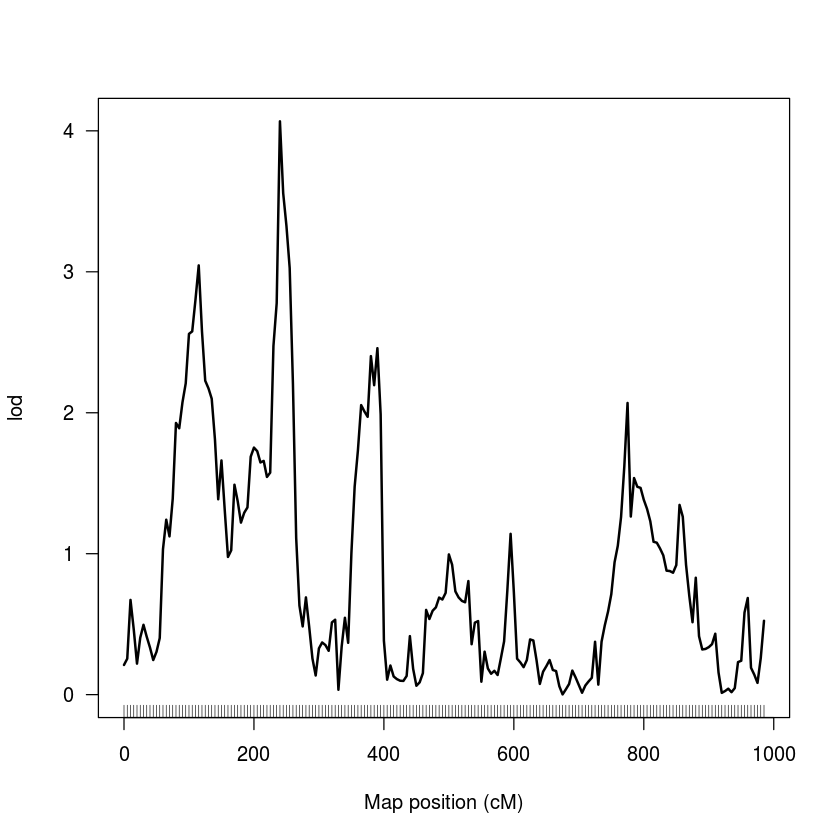

In [45]:
plot(out.acovar, chr=1)

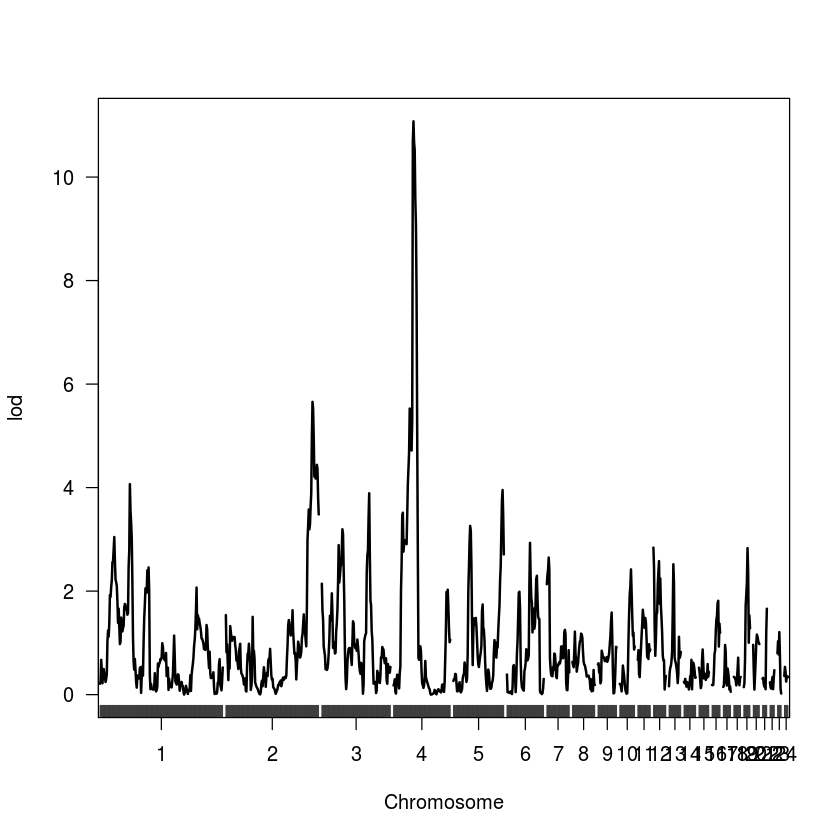

In [46]:
plot(out.acovar)

In [ ]:
#plot(out.acovar, chr=1)

In [47]:
out.acovar

,chr,pos,lod
1-1,1,0,0.2108140
1-2,1,5,0.2555853
1-3,1,10,0.6721778
1-4,1,15,0.4628844
1-5,1,20,0.2201965
1-6,1,25,0.4041117
1-7,1,30,0.4957435
1-8,1,35,0.4103691
1-9,1,40,0.3343051
1-10,1,45,0.2456663


In [49]:
write.csv(out.acovar, "20190828_out_f3_bw8_ctrlsex.csv")